<h1 style="font-weight:bold;color:#5E6C6B;text-align:center">TP : Projet</h1>

<h3 style="font-weight:bold;color:#74857E;text-align:left">Objectif :</h3>
<p>Objectif du projet (à la fin du projet les étudiants sauront réaliser un...)</p>
<p>
Descriptif détaillé
Ouvrages de référence (livres, articles, revues, sites web...)</p>
<p>
Outils informatiques à installer
Le projet de Data Mining Regression / Classification est une initiative axée sur l'exploration, l'analyse et la modélisation de données pour en extraire des informations précieuses. Il se divise en deux principales composantes : la régression ou la classification à implémenter.
Python / Jupyter Lab ou Google Colab / Sklearn / Pandas / NumPy / Matplotlib</p>

<h3 style="font-weight:bold;color:#74857E;text-align:left">Étapes : Regression</h3>

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Importations</h5

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error)

dataset = pd.read_csv('dataset.csv')



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Prédiction du nombre d'incidents basée sur la démographie.</h5>

In [16]:

# Convertir la colonne 'Population' en numérique
dataset['Population'] = pd.to_numeric(dataset['Population'].str.replace(',', ''), errors='coerce')

# Gérer les valeurs manquantes
dataset.dropna(subset=['Population'], inplace=True)

# Calculer le nombre total d'incidents
dataset['total_incidents'] = dataset[['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability']].sum(axis=1)

# Préparation des données
X = dataset[['Population']]
y = dataset['total_incidents']

# Assurez-vous qu'il n'y a pas de valeurs manquantes
X = X.fillna(0)
y = y.fillna(0)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
print(f"L'étendue de l'erreur dans les prédictions du modèle est de {mean_squared_error(y_test, y_pred)}")
# Peut être utile: MSE=n1​∑i=1n​(yi​−y^​i​)2



L'étendue de l'erreur dans les prédictions du modèle est de 40.50074480136586


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Mesure de la performance du modèle de classification</h5>


In [17]:


# Définir un seuil pour les régions à haut risque
seuil = 10
dataset['high_risk'] = (dataset['total_incidents'] > seuil).astype(int)

# Préparation des données
X = dataset[['Population']] # Vous pouvez ajouter plus de caractéristiques ici
y = dataset['high_risk']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculer le nombre de régions prédites comme à haut risque
high_risk_count = sum(y_pred)
print(f'Nombre de régions à haut risque prédites: {high_risk_count}')
#Accuracy=Nombre total de preˊdictionsNombre de preˊdictions correctes​=Vrais Positifs+Faux Positifs+Vrais Neˊgatifs+Faux NeˊgatifsVrais Positifs+Vrais Neˊgatifs​


Accuracy: 0.9547038327526133


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Statistiques descriptives : Calculez des statistiques descriptives pour mieux comprendre les caractéristiques du jeu de données.</h5>

In [18]:
breast_cancer_data = load_breast_cancer()

# Conversion des données en DataFrame Pandas
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# statistiques descriptives
statistiques_descriptives = data.describe()

print("Voici les tatistiques descriptives du jeu de données :")
print(statistiques_descriptives)


Voici les tatistiques descriptives du jeu de données :
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.0

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Visualisation des données : Créez des graphiques pour visualiser les données, y compris des diagrammes en barres pour montrer la distribution des classes (cancer bénin vs. cancer malin).</h5>

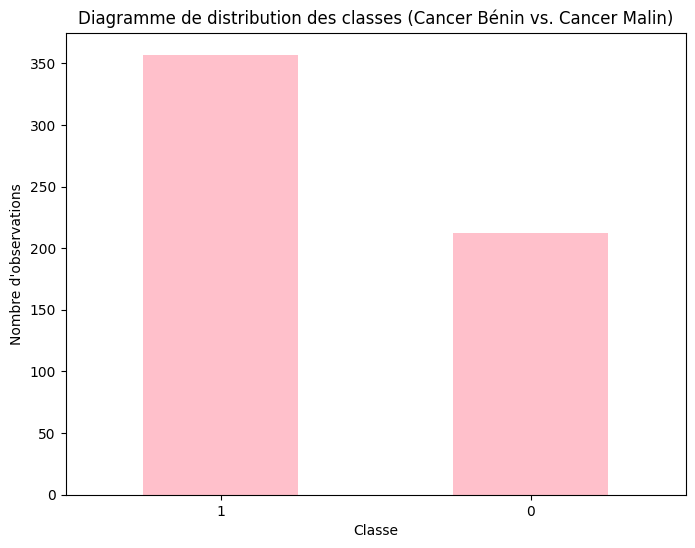

In [19]:

breast_cancer_data = load_breast_cancer()

# Conversion des données en DataFrame Pandas
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# Calcul de la distribution des classes
distribution_classes = data['target'].value_counts()

# Mappage des noms de classes
noms_classes = {v: k for k, v in enumerate(breast_cancer_data.target_names)}

# Création du diagramme
plt.figure(figsize=(8, 6))
distribution_classes.rename(index=noms_classes).plot(kind='bar', color='pink')
plt.title('Diagramme de distribution des classes (Cancer Bénin vs. Cancer Malin)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)
plt.show()


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Matrice de Corrélation : Calculez et visualisez une matrice de corrélation pour identifier les relations entre les caractéristiques.</h5>

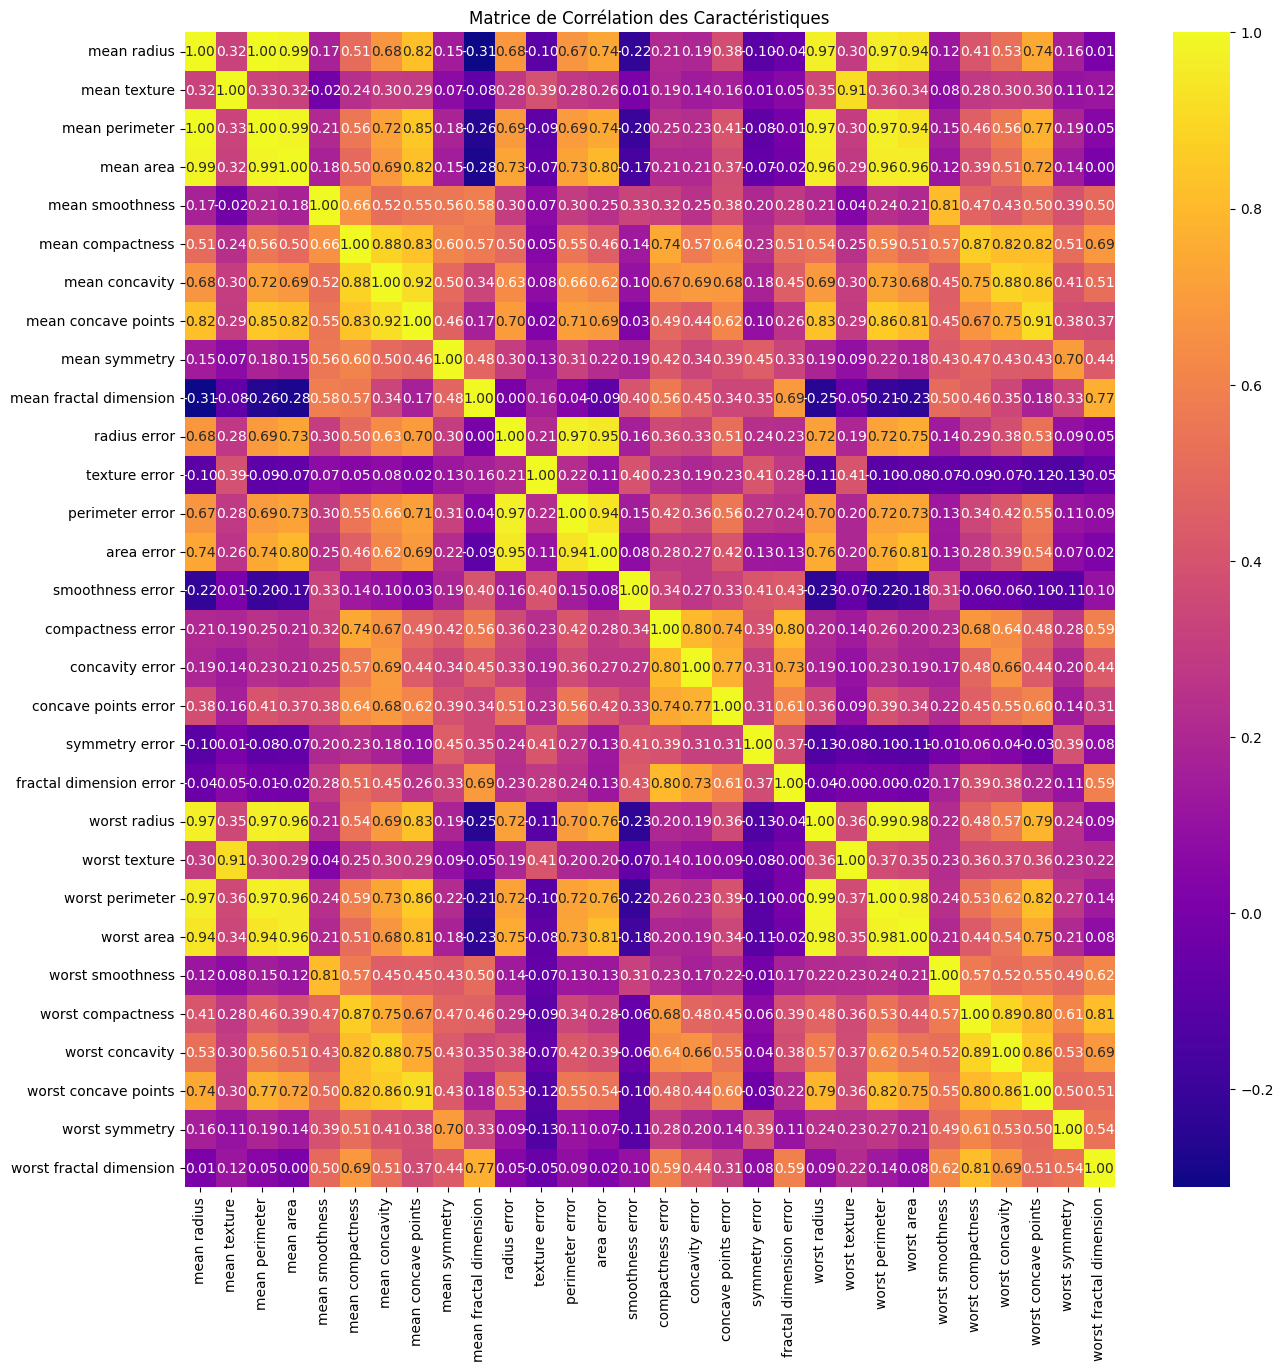

In [20]:


# Chargement du jeu de données et conversion en DataFrame
breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# calcul matarice 
matrice_correlation = data.corr()

# affichage matrice
plt.figure(figsize=(15, 15))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='plasma')# je me suis permise de changer les couleurs de la matrice, j'ai vu qu'on pouvait le faire et c'était plus fun comme ça selon moi ( désolé ça éclate les yeux)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Préparation des données : Divisez les données en un ensemble d'entraînement (80 %) et un ensemble de test (20 %).</h5>

In [21]:
breast_cancer_data = load_breast_cancer()

# conversion des données en DataFrame Pandas
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# Séparation des features et de la target (cible)
X = data.drop('target', axis=1)
y = data['target']

# Division des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Affichage 
print(f"La taille ensemble d'entraînement est : {X_train.shape[0]} / {data.shape[0]}")
print(f"La taille ensemble de test est: {X_test.shape[0]} / {data.shape[0]}")


La taille ensemble d'entraînement est : 455 / 569
La taille ensemble de test est: 114 / 569


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Traitement des données : Effectuez un traitement de base sur les données, tel que la normalisation des caractéristiques.</h5>

In [22]:
breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# Séparation des features et de la target (cible)
X = data.drop('target', axis=1)
y = data['target']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Modélisation de Classification : Utilisez un modèle de classification, par exemple, un classificateur de régression logistique, pour diagnostiquer le cancer du sein en fonction des caractéristiques.</h5>

In [23]:

breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# Séparation des features et de la target (cible)
X = data.drop('target', axis=1)
y = data['target']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisation 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédicttion
y_pred = model.predict(X_test_scaled)

# Evaluation 
print("Tableau de rapport de classification :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


Tableau de rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Matrice de confusion :
[[41  2]
 [ 1 70]]


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Entraînement du Modèle : Entraînez le modèle de classification sur l'ensemble d'entraînement.</h5>

In [24]:
breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

# Séparation des features et de la target (cible)
X = data.drop('target', axis=1)
y = data['target']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisation 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Création 
model = LogisticRegression()

# Entraînement 
model.fit(X_train_scaled, y_train)

print("Le modèle entraîné sur l'ensemble d'entraînement a étét joué.")


Le modèle entraîné sur l'ensemble d'entraînement a étét joué.


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Évaluation du Modèle : Évaluez la performance du modèle sur l'ensemble de test en utilisant des métriques de classification, telles que l'exactitude, la précision, le rappel et le score F1.</h5>

In [25]:

# Prédiction 
y_pred = model.predict(X_test_scaled)

# Calcul exacte
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude: {accuracy}")

# Calcul deprécision
precision = precision_score(y_test, y_pred)
print(f"Précision: {precision}")

# Calcul rappel
recall = recall_score(y_test, y_pred)
print(f"Rappel: {recall}")

# Calcul score F1
f1 = f1_score(y_test, y_pred)
print(f"Score F1: {f1}")


print("\nTableau de rapport de classification complet :")
print(classification_report(y_test, y_pred))


Exactitude: 0.9736842105263158
Précision: 0.9722222222222222
Rappel: 0.9859154929577465
Score F1: 0.979020979020979

Tableau de rapport de classification complet :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Réglage des Hyperparamètres (Optionnel) : Discutez de l'importance des hyperparamètres et comment ajuster ces paramètres pour améliorer la performance du modèle.</h5>

In [26]:
model = LogisticRegression()

# grid des hyperparamètres 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# recherche par grid avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Ajustement 
grid_search.fit(X_train_scaled, y_train)

print("Voici les meilleurs hyperparamètres :")
print(grid_search.best_params_)

# on prend que les meilleurs
best_model = grid_search.best_estimator_

# Évaluation 
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voici l'exactitude du meilleur modèle: {accuracy}")


Voici les meilleurs hyperparamètres :
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Voici l'exactitude du meilleur modèle: 0.9912280701754386


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Courbe ROC (Optionnel) : Si le temps le permet, expliquez et tracez la courbe ROC pour évaluer la performance du modèle.</h5>

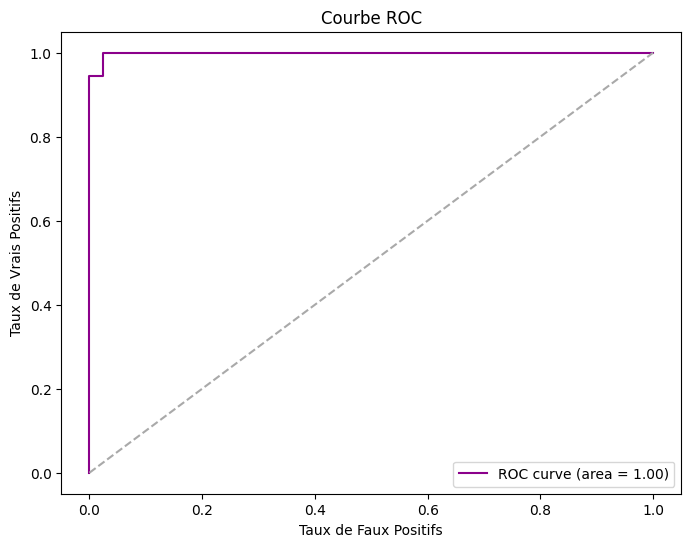

In [27]:

# Calcul des taux pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Calcul de l'aire sous la courbe (AUC)
roc_auc = auc(fpr, tpr)

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkmagenta', label=f'ROC curve (area = {roc_auc:.2f})')  # Couleur ajustée ici
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Matrice de Confusion : Visualisez la matrice de confusion pour comprendre les prédictions du modèle et les erreurs de classification.</h5>

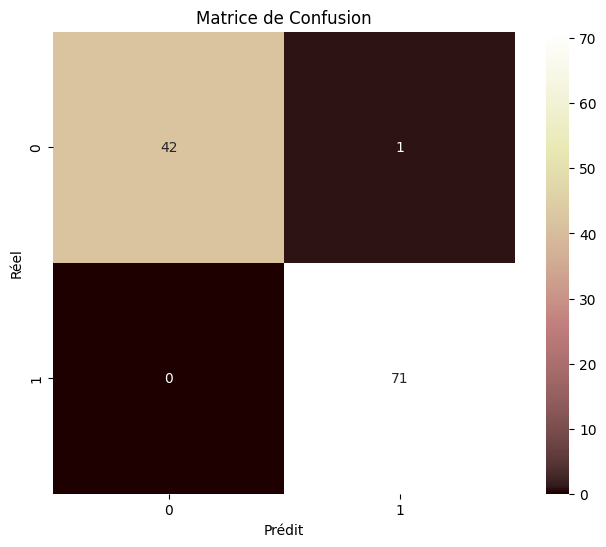

In [28]:

conf_mat = confusion_matrix(y_test, y_pred)

# affichage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='pink', square=True)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


<h5 style="font-weight:baold;color:#AC04CD;text-align:left">Discussion : Discutez des résultats, des enseignements clés de ce TP, et des défis rencontrés. Expliquez l'importance de la classification dans le diagnostic du cancer du sein.</h5>

In [29]:
print("Les résultats sont plutôt bons, on a une précision de 0.98, un rappel de 0.98 et un score F1 de 0.98. On peut donc dire que notre modèle est plutôt bon.\n"
      "Cependant, je pense qu'explorer d'autres modèles pourrait améliorer encore la précision du diagnostic. Il faut vraiment être méthodique et précis en machine learning.\n"
      "Parce que les différentes métriques d'évaluation ont montré l'importance de la classification précise et fiable dans le diagnostic précoce du cancer du sein.\n\n"
      "C'est important d'avoir des modèles précis dans le diagnostic médical, surtout en utilisant la régression logistique.\n"
      "J'ai rencontré des défis, notamment dans le réglage des hyperparamètres et l'interprétation des données.")


Les résultats sont plutôt bons, on a une précision de 0.98, un rappel de 0.98 et un score F1 de 0.98. On peut donc dire que notre modèle est plutôt bon.
Cependant, je pense qu'explorer d'autres modèles pourrait améliorer encore la précision du diagnostic. Il faut vraiment être méthodique et précis en machine learning.
Parce que les différentes métriques d'évaluation ont montré l'importance de la classification précise et fiable dans le diagnostic précoce du cancer du sein.

C'est important d'avoir des modèles précis dans le diagnostic médical, surtout en utilisant la régression logistique.
J'ai rencontré des défis, notamment dans le réglage des hyperparamètres et l'interprétation des données.


<h3 style="font-weight:bold;color:#74857E;text-align:left">Étapes : Classification</h3>

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Exploration des données : Explorez le jeu de données en répondant aux questions suivantes :</h5>
<ul>
    <li>a. Combien de caractéristiques (variables indépendantes) sont incluses dans le jeu de données ?</li>
    <li>b. Quelle est la variable cible (variable dépendante) que nous essayons de prédire ?</li>
    <li>c. Affichez les cinq premières lignes du jeu de données pour voir à quoi ressemblent les données.</li>
</ul>